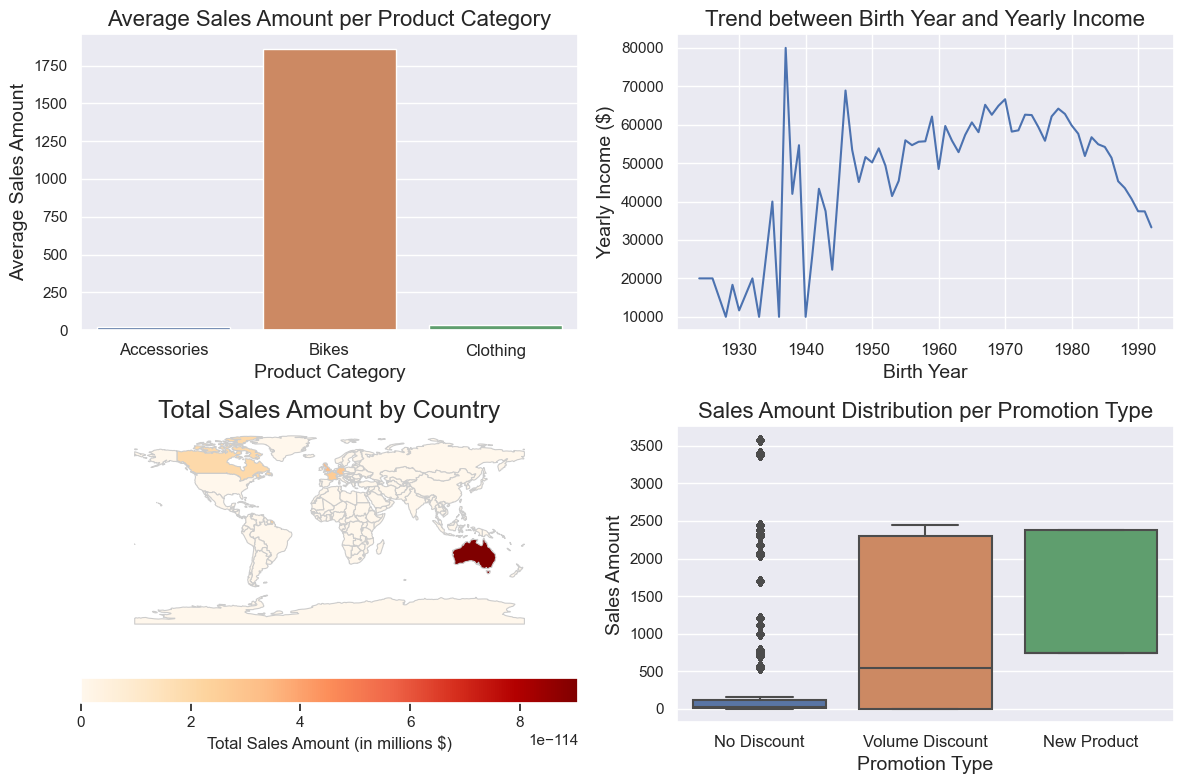

In [20]:
# Loading the Data
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import gridspec
# Creating a figure
fig = plt.figure(figsize=(12, 8))  
gs = gridspec.GridSpec(2, 2)  # 2 rows, 2 columns

# 1. Bar Chart: Average Sales Amount per Product Category
ax0 = plt.subplot(gs[0, 0])
sns.barplot(y='SalesAmount', x='ProductCategoryName', data=final_df, estimator=lambda x: sum(x) / len(x), ci=None, ax=ax0)
ax0.set_title('Average Sales Amount per Product Category', fontsize=16)
ax0.set_ylabel('Average Sales Amount', fontsize=14)
ax0.set_xlabel('Product Category', fontsize=14)
ax0.tick_params(axis='x', labelsize=12)  # Rotate x-axis labels for better readability

# 2. Line Plot: Relationship between Yearly Income and Birth Year
ax1 = plt.subplot(gs[0, 1])
sns.lineplot(x='BirthYear', y='YearlyIncome', data=final_df, errorbar=None, ax=ax1)
ax1.set_title('Trend between Birth Year and Yearly Income', fontsize=16)
ax1.set_xlabel('Birth Year', fontsize=14)
ax1.set_ylabel('Yearly Income ($)', fontsize=14)
ax1.tick_params(axis='x', labelsize=12)  # Rotate x-axis labels for better readability

# 3. Geographic Plot: Sales Amount by Country
ax2 = plt.subplot(gs[1, 0])  # Adjusted the subplot index to position side by side
geo_df['SalesAmount'] = geo_df['SalesAmount'] / 1e6  # convert to millions
geo_plot = geo_df.plot(column='SalesAmount', cmap='OrRd', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True,
                       legend_kwds={'label': "Total Sales Amount (in millions $)",
                                    'orientation': "horizontal"})
ax2.set_title('Total Sales Amount by Country', fontdict={'fontsize': '18', 'fontweight': '3'})
ax2.set_axis_off()
# Setting fontsize of colorbar labels
if geo_plot.get_legend():
    geo_plot.get_legend().get_texts()[0].set_fontsize(12)  # Adjusting the fontsize of the legend label

# 4. Boxplot: Sales Amount Distribution per Promotion Type
ax3 = plt.subplot(gs[1, 1])  # Adjusted the subplot index to position side by side
sns.boxplot(y='SalesAmount', x='EnglishPromotionType', data=final_df, ax=ax3)
ax3.set_title('Sales Amount Distribution per Promotion Type', fontsize=16)
ax3.set_ylabel('Sales Amount', fontsize=14)
ax3.set_xlabel('Promotion Type', fontsize=14)
ax3.tick_params(axis='x', labelsize=12)  # Rotate x-axis labels for better readability

# Adjust spaces between plots
plt.tight_layout()

# Save the figure
plt.savefig('Multiple_Plots.png')

# Show the figure
plt.show()
